In [6]:
import pickle
import matplotlib.pyplot
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

# For NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Load Collected Data
with open('penguinz0/video_ids.pkl', 'rb') as file:
    video_ids = pickle.load(file)
with open('penguinz0/video_df.pkl', 'rb') as file:
    video_df = pickle.load(file)
with open('penguinz0/comments.pkl', 'rb') as file:
    comments = pickle.load(file)

## Data pre-processing

In [8]:
# Check any Null
video_df.isnull().any()


id                False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [9]:
# Check Datatypes
video_df.dtypes

id                object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [10]:
from dateutil import parser
import isodate

# Convert Integer Column into Numeric
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Convert Date Published into Day Name
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishedDay'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

# Convert the youtube duration format into isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].apply(lambda x: x.total_seconds())

# Add length of tag for each videos
video_df['tag_length'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [11]:
video_df

,id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishedDay,durationSecs,tag_length
0,J_MamX_v_Zg,penguinz0,Twitch vs Youtube,This is the greatest streaming platform inform...,None,2023-09-29 18:15:01+00:00,1619313.0,74450.0,NaN,3535.0,PT17M9S,hd,false,Friday,1029.0,0
1,KJFObIJk9FY,penguinz0,Evil Wife,This is the greatest video evidence of All Tim...,None,2023-09-29 00:30:09+00:00,3684374.0,171816.0,NaN,10252.0,PT10M45S,hd,false,Friday,645.0,0
2,ICBFRqZ8zxs,penguinz0,Pumpkin Spice Tier List,Get the Starforge Godslap PC here https://star...,None,2023-09-28 19:30:03+00:00,1053578.0,40867.0,NaN,2259.0,PT37M55S,hd,false,Thursday,2275.0,0
3,yPr8p9PD634,penguinz0,iPhone 15 Drama,This is the greatest durability test of All Ti...,None,2023-09-27 19:00:35+00:00,3411464.0,145995.0,NaN,10844.0,PT10M2S,hd,false,Wednesday,602.0,0
4,_xmmhV5lO2M,penguinz0,Getting goofy,Merch https://moistglobal.com/\nComics https:/...,None,2023-09-27 05:40:42+00:00,380474.0,9407.0,NaN,228.0,PT2H52M41S,hd,false,Wednesday,10361.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4730,tUqqYskyszo,penguinz0,Halo 3- Hayabusa Armor tutorial,get IWHBYD skull:\nyou must jump throught the ...,"[halo, hayabusa, armor, tutorial, MoB, InsAnE]",2007-10-03 01:25:13+00:00,359548.0,3321.0,NaN,859.0,PT6M46S,sd,false,Wednesday,406.0,6
4731,lIQpKQ1dIqc,penguinz0,Halo 3- full hayabusa armor,PLEASE READ: I'm tired of gettin messages aski...,"[halo, ful, hayabusa, armor]",2007-09-30 14:26:27+00:00,248102.0,2903.0,NaN,665.0,PT31S,sd,false,Sunday,31.0,4
4732,tQbkowZSEvk,penguinz0,skate- freeskate in the x games,free skating in the x games,"[skate, games, free]",2007-09-19 11:00:44+00:00,392576.0,3333.0,NaN,526.0,PT1M26S,sd,false,Wednesday,86.0,3
4733,ad4qga-xNDU,penguinz0,Cr1TiKaL's 1st sniper montage,when i made this video my gamertag was MoB o I...,"[mob, insane, gow, gears, of, war, headshot, m...",2007-08-14 19:39:56+00:00,534852.0,15328.0,NaN,2150.0,PT3M10S,sd,false,Tuesday,190.0,9


## EDA

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Best Videos by Viewers

C:\Users\USER\AppData\Local\Temp\ipykernel_6216\294991880.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


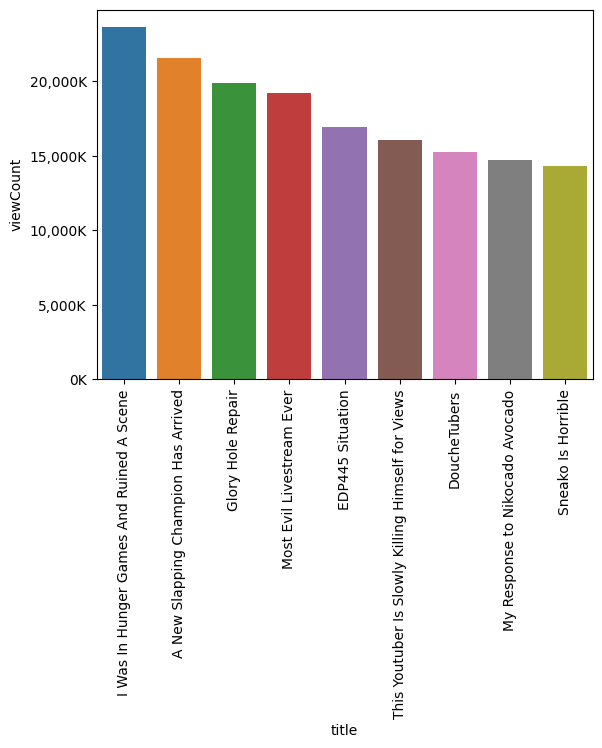

In [13]:
colors = sns.color_palette("Set3")
ax = sns.barplot(x = 'title', y='viewCount', data=video_df.sort_values('viewCount', ascending=False)[0:9],  hue='title')
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))
plt.show()

### Worst Videos by Viewers

C:\Users\USER\AppData\Local\Temp\ipykernel_6216\1088951871.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


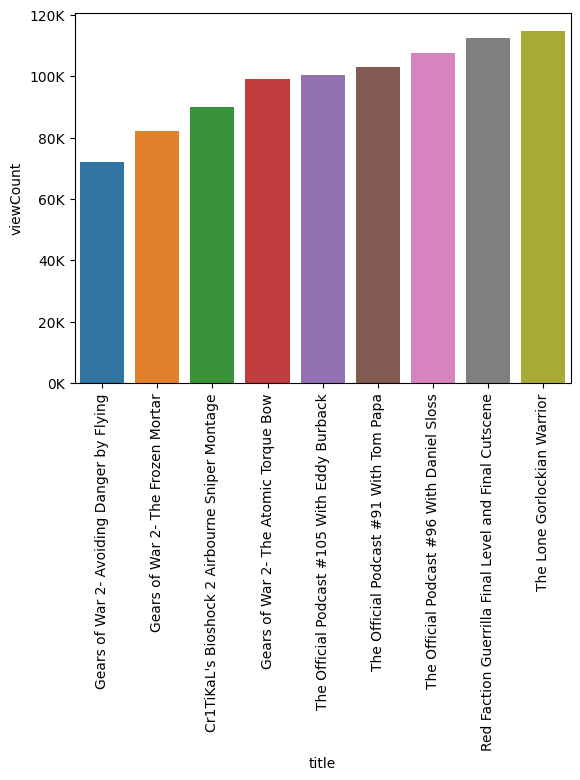

In [14]:
colors = sns.color_palette("Set3")
ax = sns.barplot(x = 'title', y='viewCount', data=video_df.sort_values('viewCount', ascending=True)[0:9],  hue='title')
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))
plt.show()

### Distribution of his Videos

C:\Users\USER\AppData\Local\Temp\ipykernel_6216\3776080394.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{}M'.format(y/1000000) for y in ax.get_yticks()])


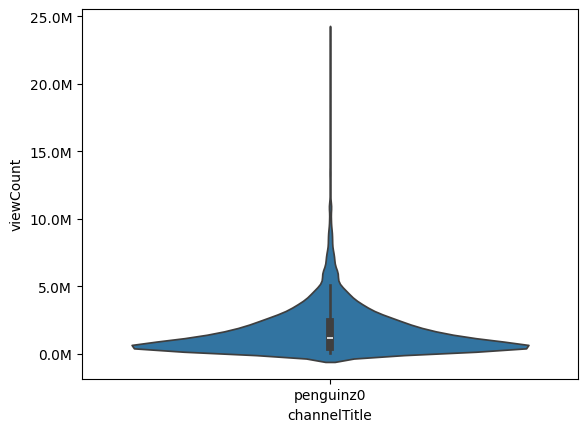

In [15]:
ax = sns.violinplot(data=video_df, x="channelTitle", y="viewCount")
ax.set_yticklabels(['{}M'.format(y/1000000) for y in ax.get_yticks()])
plt.show()


### Views vs Likes and Comments

C:\Users\USER\AppData\Local\Temp\ipykernel_6216\601350671.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(['{}M'.format(y/1000000) for y in ax[0].get_yticks()])
C:\Users\USER\AppData\Local\Temp\ipykernel_6216\601350671.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(['{}M'.format(y/1000000) for y in ax[1].get_yticks()])


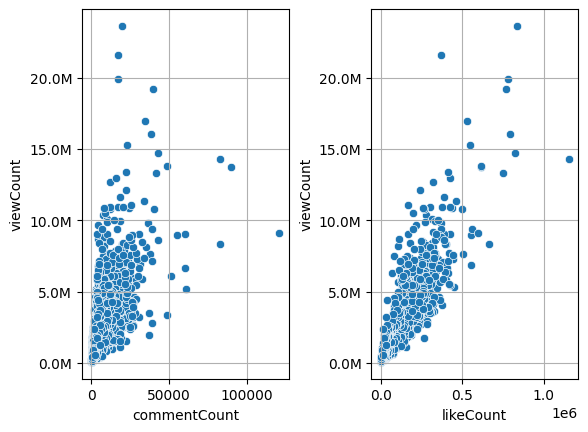

In [16]:
# All Videos
fig, ax = plt.subplots(1,2)
ax[0].grid(True)
ax[1].grid(True)
sns.scatterplot(data=video_df, x='commentCount', y='viewCount', ax=ax[0])
ax[0].set_yticklabels(['{}M'.format(y/1000000) for y in ax[0].get_yticks()])
sns.scatterplot(data=video_df, x='likeCount', y='viewCount', ax=ax[1])
ax[1].set_yticklabels(['{}M'.format(y/1000000) for y in ax[1].get_yticks()])

plt.subplots_adjust(wspace=0.4)

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6216\2308101137.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(['{}M'.format(y/1000000) for y in ax[0].get_yticks()])
C:\Users\USER\AppData\Local\Temp\ipykernel_6216\2308101137.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(['{}M'.format(y/1000000) for y in ax[1].get_yticks()])


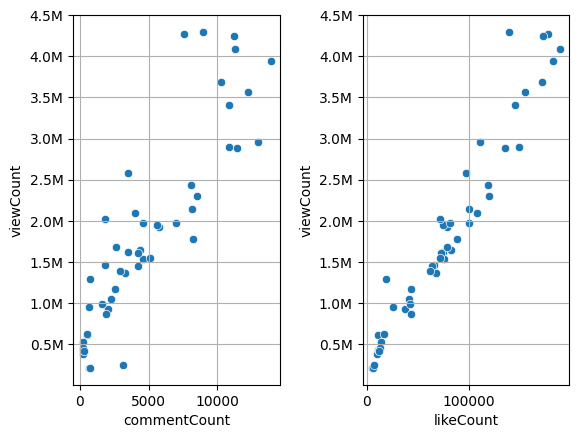

In [17]:
# Recent Videos
fig, ax = plt.subplots(1,2)
ax[0].grid(True)
ax[1].grid(True)
sns.scatterplot(data=video_df[0:50], x='commentCount', y='viewCount', ax=ax[0])
ax[0].set_yticklabels(['{}M'.format(y/1000000) for y in ax[0].get_yticks()])
sns.scatterplot(data=video_df[0:50], x='likeCount', y='viewCount', ax=ax[1])
ax[1].set_yticklabels(['{}M'.format(y/1000000) for y in ax[1].get_yticks()])

plt.subplots_adjust(wspace=0.4)

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6216\2889900706.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(['{}M'.format(y/1000000) for y in ax[0].get_yticks()])
C:\Users\USER\AppData\Local\Temp\ipykernel_6216\2889900706.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(['{}M'.format(y/1000000) for y in ax[1].get_yticks()])


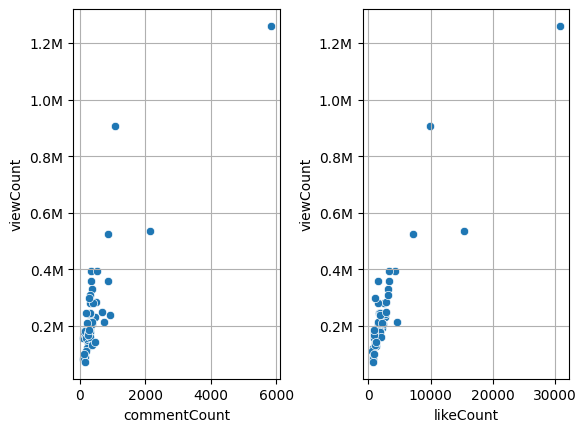

In [18]:
# Recent Videos
fig, ax = plt.subplots(1,2)
ax[0].grid(True)
ax[1].grid(True)
sns.scatterplot(data=video_df[-50:], x='commentCount', y='viewCount', ax=ax[0])
ax[0].set_yticklabels(['{}M'.format(y/1000000) for y in ax[0].get_yticks()])
sns.scatterplot(data=video_df[-50:], x='likeCount', y='viewCount', ax=ax[1])
ax[1].set_yticklabels(['{}M'.format(y/1000000) for y in ax[1].get_yticks()])

plt.subplots_adjust(wspace=0.4)

plt.show()

### Video Duration Vs Viewer Count

C:\Users\USER\AppData\Local\Temp\ipykernel_6216\136498572.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{}M'.format(y/1000000) for y in ax.get_yticks()])


[Text(0, -5000000.0, '-5.0M'),
 Text(0, 0.0, '0.0M'),
 Text(0, 5000000.0, '5.0M'),
 Text(0, 10000000.0, '10.0M'),
 Text(0, 15000000.0, '15.0M'),
 Text(0, 20000000.0, '20.0M'),
 Text(0, 25000000.0, '25.0M')]

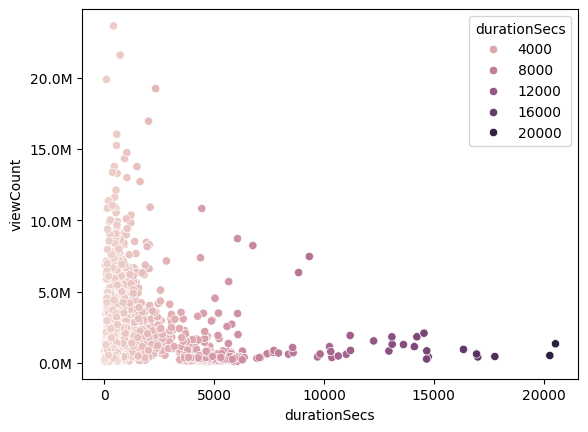

In [19]:
ax = sns.scatterplot(data = video_df, x='durationSecs', y='viewCount', hue="durationSecs")
ax.set_yticklabels(['{}M'.format(y/1000000) for y in ax.get_yticks()])



### Average Duration

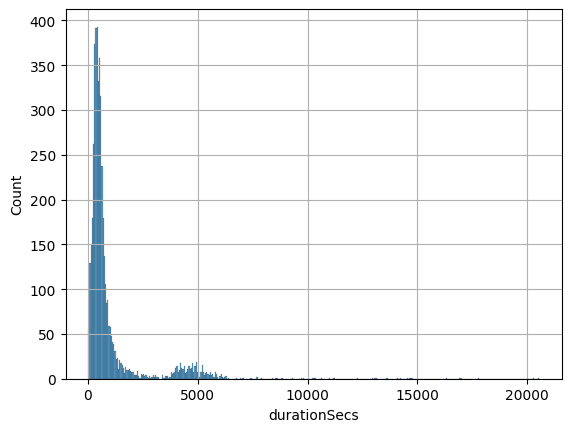

In [20]:
# All Videos
sns.histplot(data = video_df, x='durationSecs')
plt.grid(True)

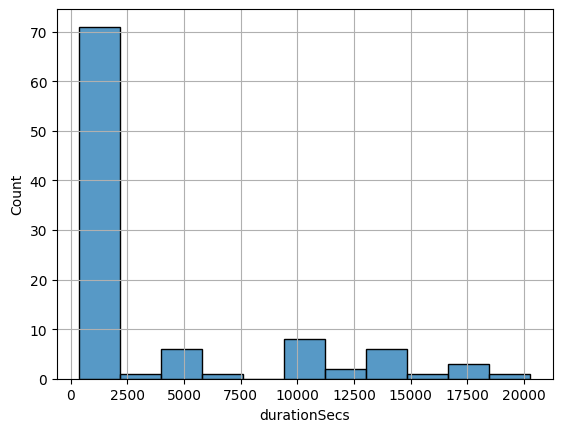

In [21]:
# Recent Videos
sns.histplot(data = video_df[:100], x='durationSecs')
plt.grid(True)

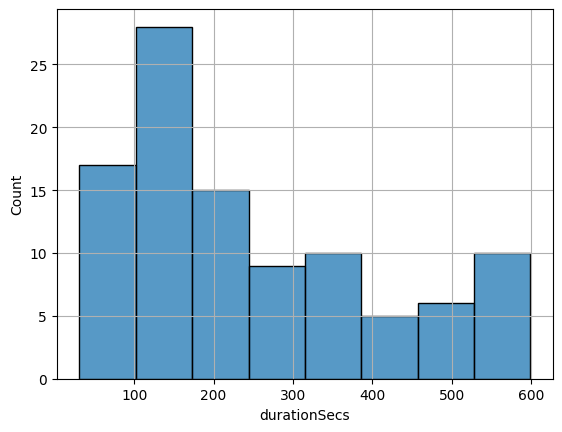

In [22]:
# Oldest Videos
sns.histplot(data = video_df[-100:], x='durationSecs')
plt.grid(True)

### Wordcloud for Video Titles

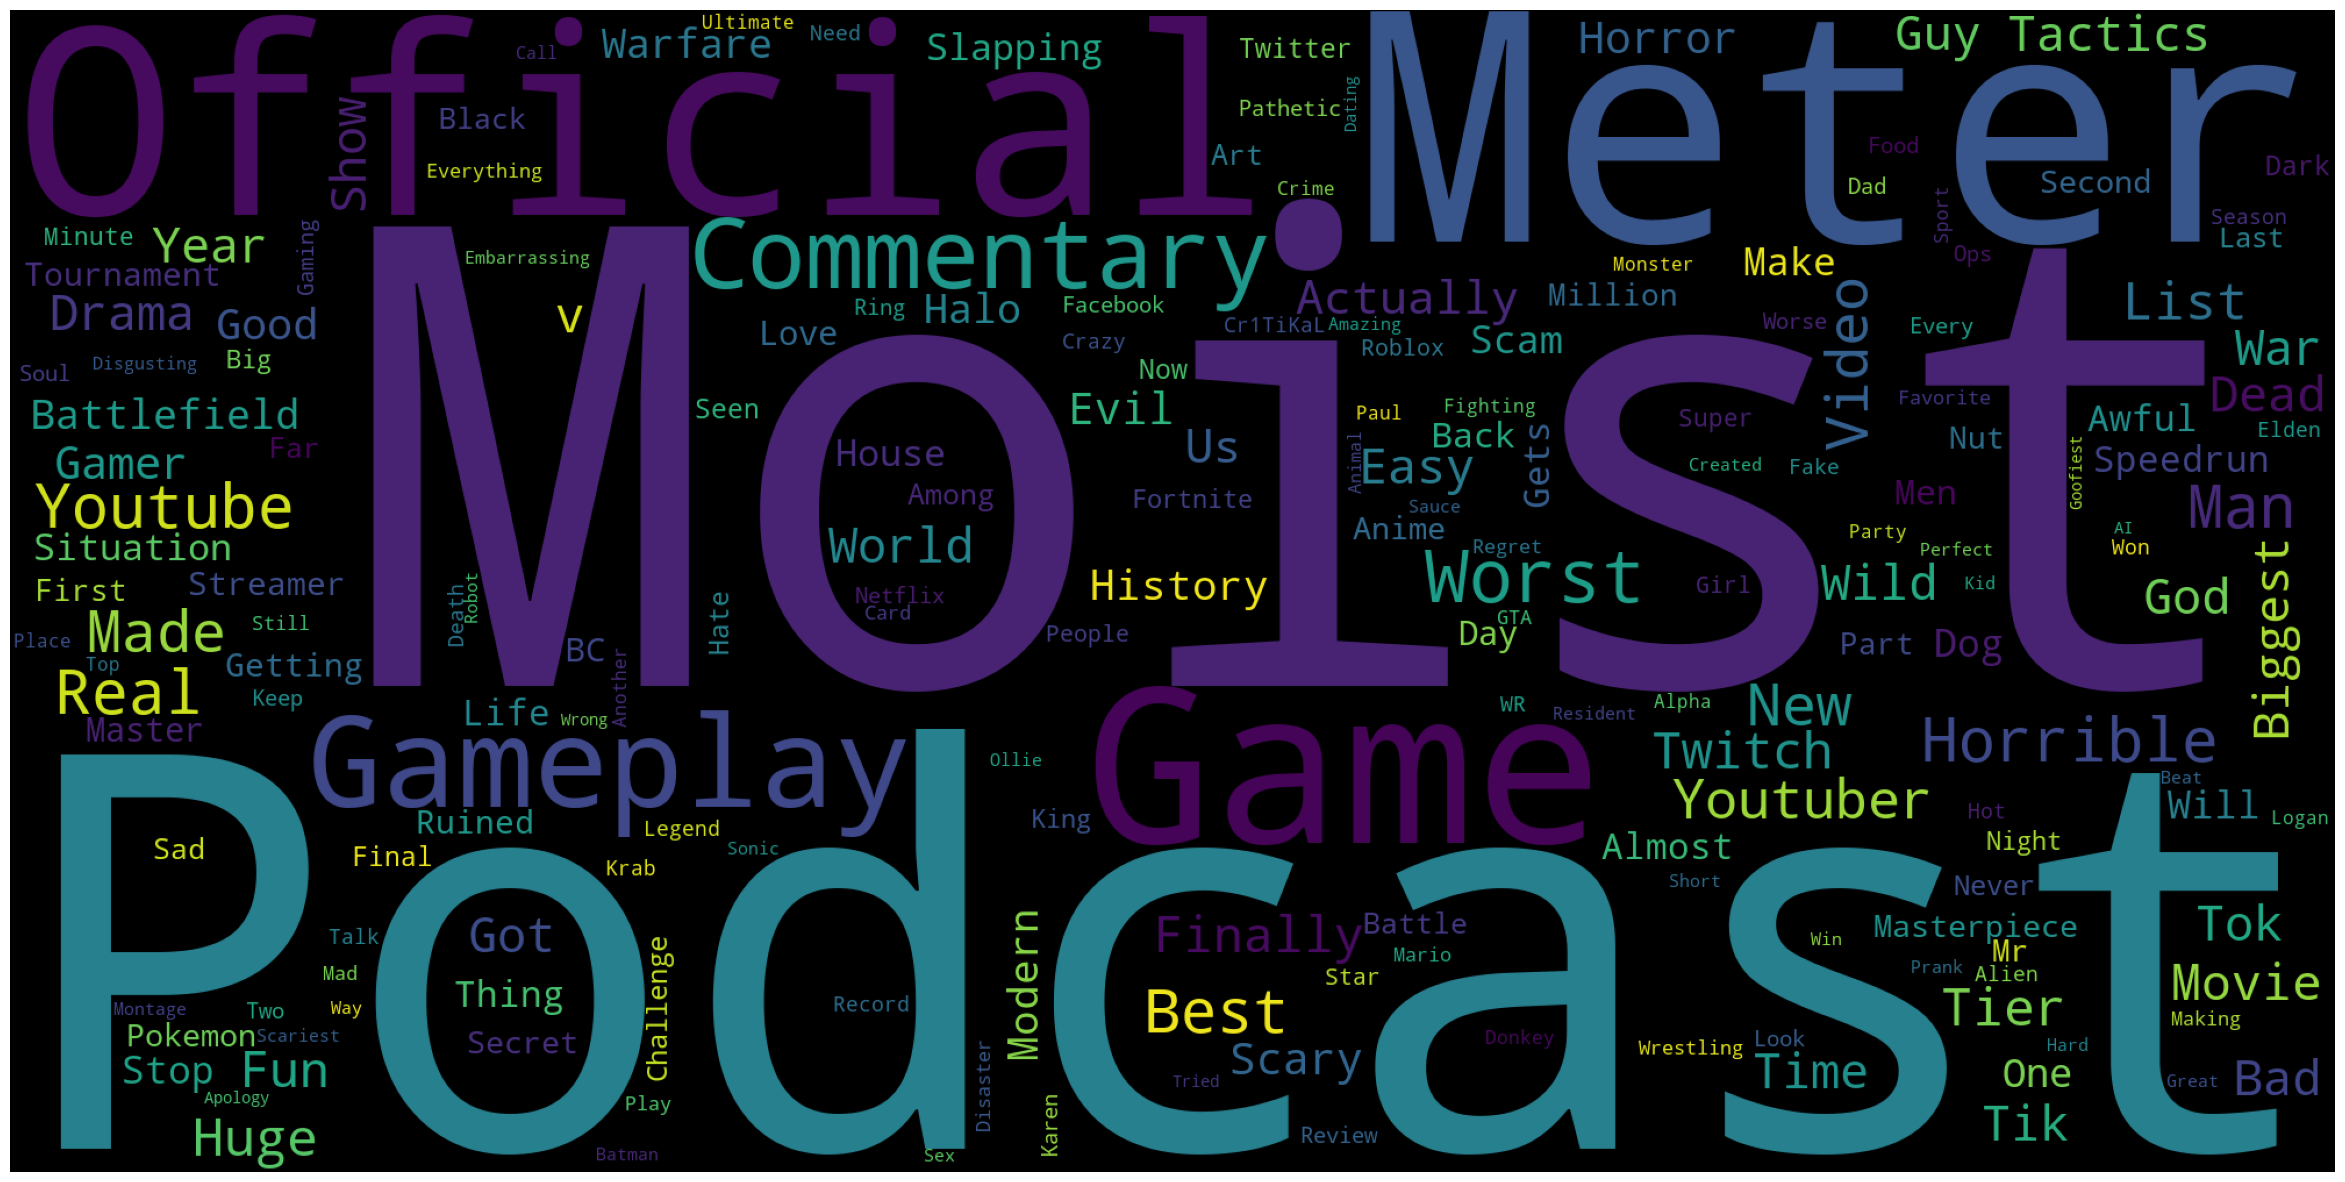

In [23]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [24]:
video_df[video_df['title'].str.contains('MOIST', case=False, na=False)].head(5)

,id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishedDay,durationSecs,tag_length,title_no_stopwords
97,fieZETwnAwY,penguinz0,Moist Meter | Blue Beetle,Order tickets for my first live event here htt...,None,2023-08-18 18:00:16+00:00,1039566.0,45337.0,NaN,2455.0,PT9M52S,hd,false,Friday,592.0,0,"[Moist, Meter, |, Blue, Beetle]"
150,SiTO-89uKJw,penguinz0,Moist Meter | Oppenheimer,CHECK OUT GODSLAP AND PLAGUE SEEKER: \nhttps:/...,None,2023-07-22 19:30:03+00:00,2491416.0,110499.0,NaN,6172.0,PT9M58S,hd,false,Saturday,598.0,0,"[Moist, Meter, |, Oppenheimer]"
153,PR2VqRmg-JY,penguinz0,Moist Meter | Barbie,This is the greatest barbie movie of All Time\...,None,2023-07-21 02:15:00+00:00,2356842.0,101637.0,NaN,10397.0,PT9M7S,hd,false,Friday,547.0,0,"[Moist, Meter, |, Barbie]"
168,WjCqmdkDGMo,penguinz0,Moist Meter | Mission Impossible: Dead Reckoning,Order GodSlap and Plague Seeker here https://b...,None,2023-07-13 18:15:02+00:00,631876.0,29545.0,NaN,1784.0,PT10M4S,hd,false,Thursday,604.0,0,"[Moist, Meter, |, Mission, Impossible:, Dead, ..."
188,OozpZ5ODRw0,penguinz0,Moist Meter | Indiana Jones and the Dial of De...,Order Godslap and Plague Seeker https://badegg...,None,2023-07-03 18:00:08+00:00,780294.0,29837.0,NaN,2501.0,PT12M18S,hd,false,Monday,738.0,0,"[Moist, Meter, |, Indiana, Jones, Dial, Destiny]"


In [25]:
video_df[video_df['title'].str.contains('Podcast', case=False, na=False)].head(5)


,id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishedDay,durationSecs,tag_length,title_no_stopwords
13,FptKWS7yB18,penguinz0,The Official Podcast #355: What's the Deal wit...,Four close man friends gather around to talk a...,None,2023-09-23 16:00:09+00:00,211099.0,4947.0,NaN,691.0,PT1H25M33S,hd,false,Saturday,5133.0,0,"[The, Official, Podcast, #355:, What's, Deal, ..."
26,vmPxfpTODEQ,penguinz0,The Official Podcast #354: Aliens Have Arrived,Four close man friends gather around to talk a...,None,2023-09-17 18:15:05+00:00,215605.0,5879.0,NaN,725.0,PT1H31M,hd,false,Sunday,5460.0,0,"[The, Official, Podcast, #354:, Aliens, Have, ..."
43,yKuA8koweIg,penguinz0,The Official Podcast #353: Starfield Debate,Four close man friends gather around to talk a...,None,2023-09-10 16:00:45+00:00,244929.0,6436.0,NaN,3117.0,PT1H16M32S,hd,false,Sunday,4592.0,0,"[The, Official, Podcast, #353:, Starfield, Deb..."
67,2hKd98-LBcc,penguinz0,The Official Podcast #352: Charlie Eats Shrimp...,Four close man friends gather around to talk a...,None,2023-08-31 16:00:02+00:00,156866.0,4228.0,NaN,425.0,PT1H30M22S,hd,false,Thursday,5422.0,0,"[The, Official, Podcast, #352:, Charlie, Eats,..."
81,N_PJTS70XNA,penguinz0,The Official Podcast #351: Dangers of Being Tall,Four close man friends gather around to talk a...,None,2023-08-25 20:30:03+00:00,159679.0,4735.0,NaN,669.0,PT1H12M56S,hd,false,Friday,4376.0,0,"[The, Official, Podcast, #351:, Dangers, Being..."


### Upload Schedule Days

<Axes: xlabel='publishedDay', ylabel='count'>

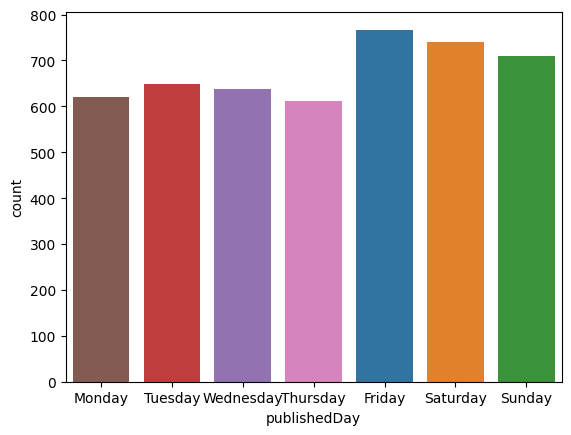

In [26]:
# All Videos
day_df = pd.DataFrame(video_df['publishedDay'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='publishedDay', y='count', data=day_df, order=weekdays, hue="publishedDay")

<Axes: xlabel='publishedDay', ylabel='count'>

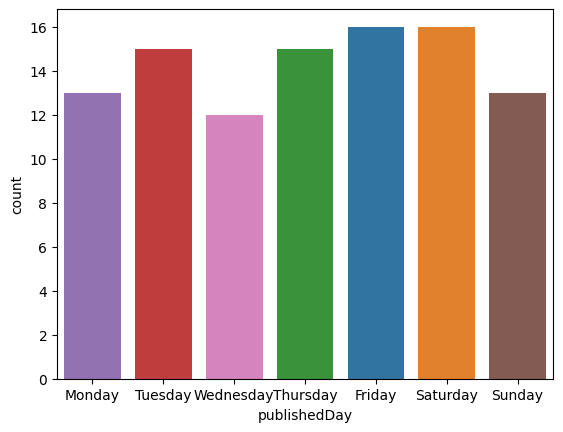

In [27]:
# Recent Videos
day_df = pd.DataFrame(video_df['publishedDay'][:100].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='publishedDay', y='count', data=day_df, order=weekdays, hue="publishedDay")

### Wordcloud for Top Comments

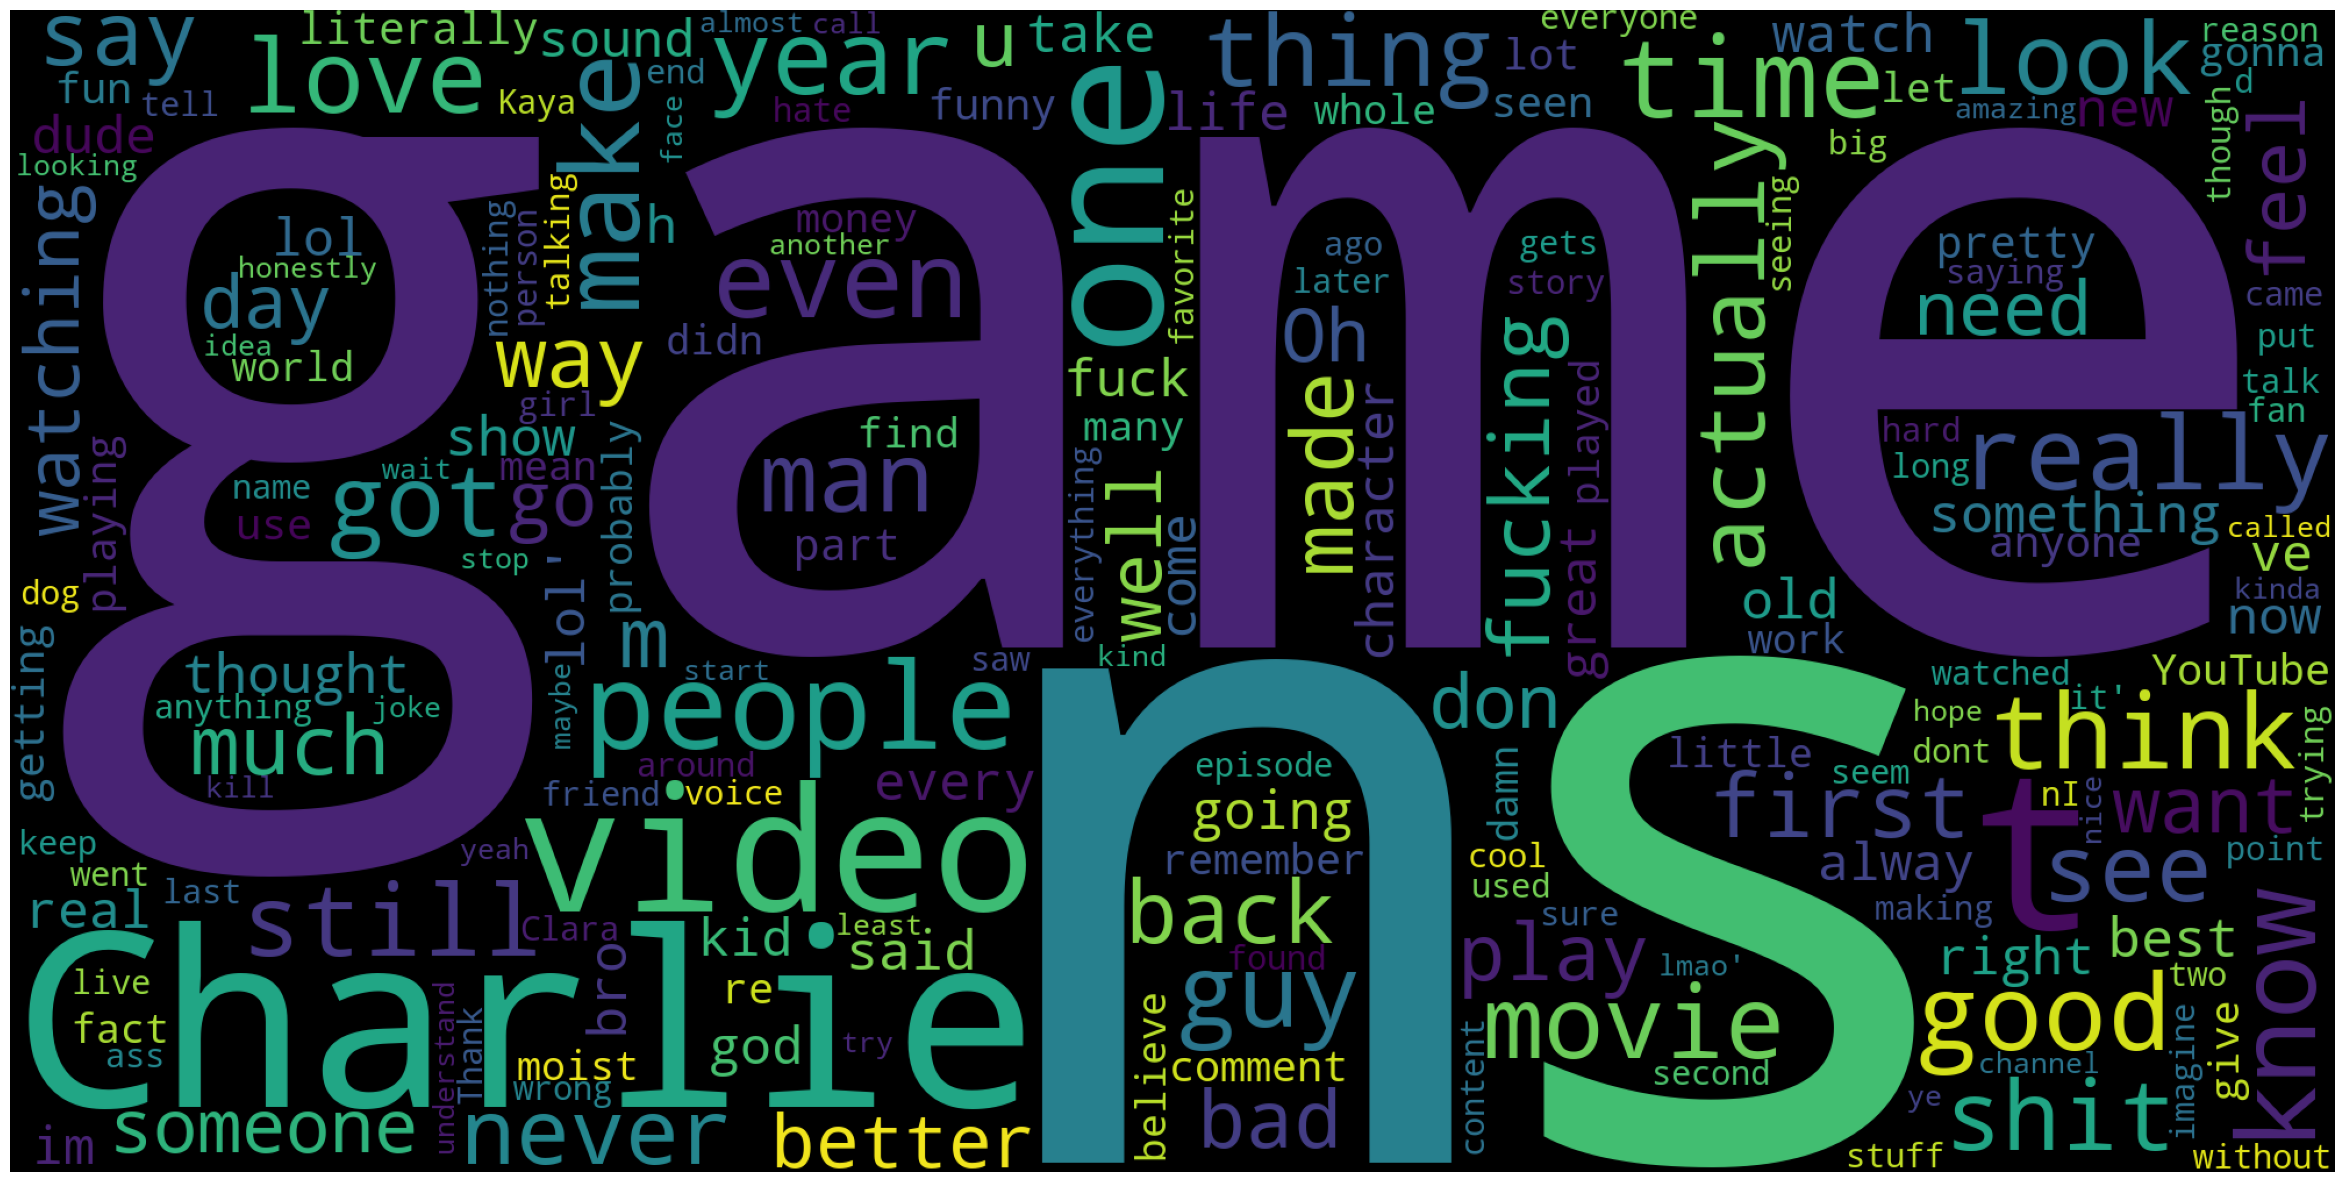

In [42]:
# With Stopwords
stop_words = set(stopwords.words('english'))
comments['comments_no_stopwords'] = comments['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

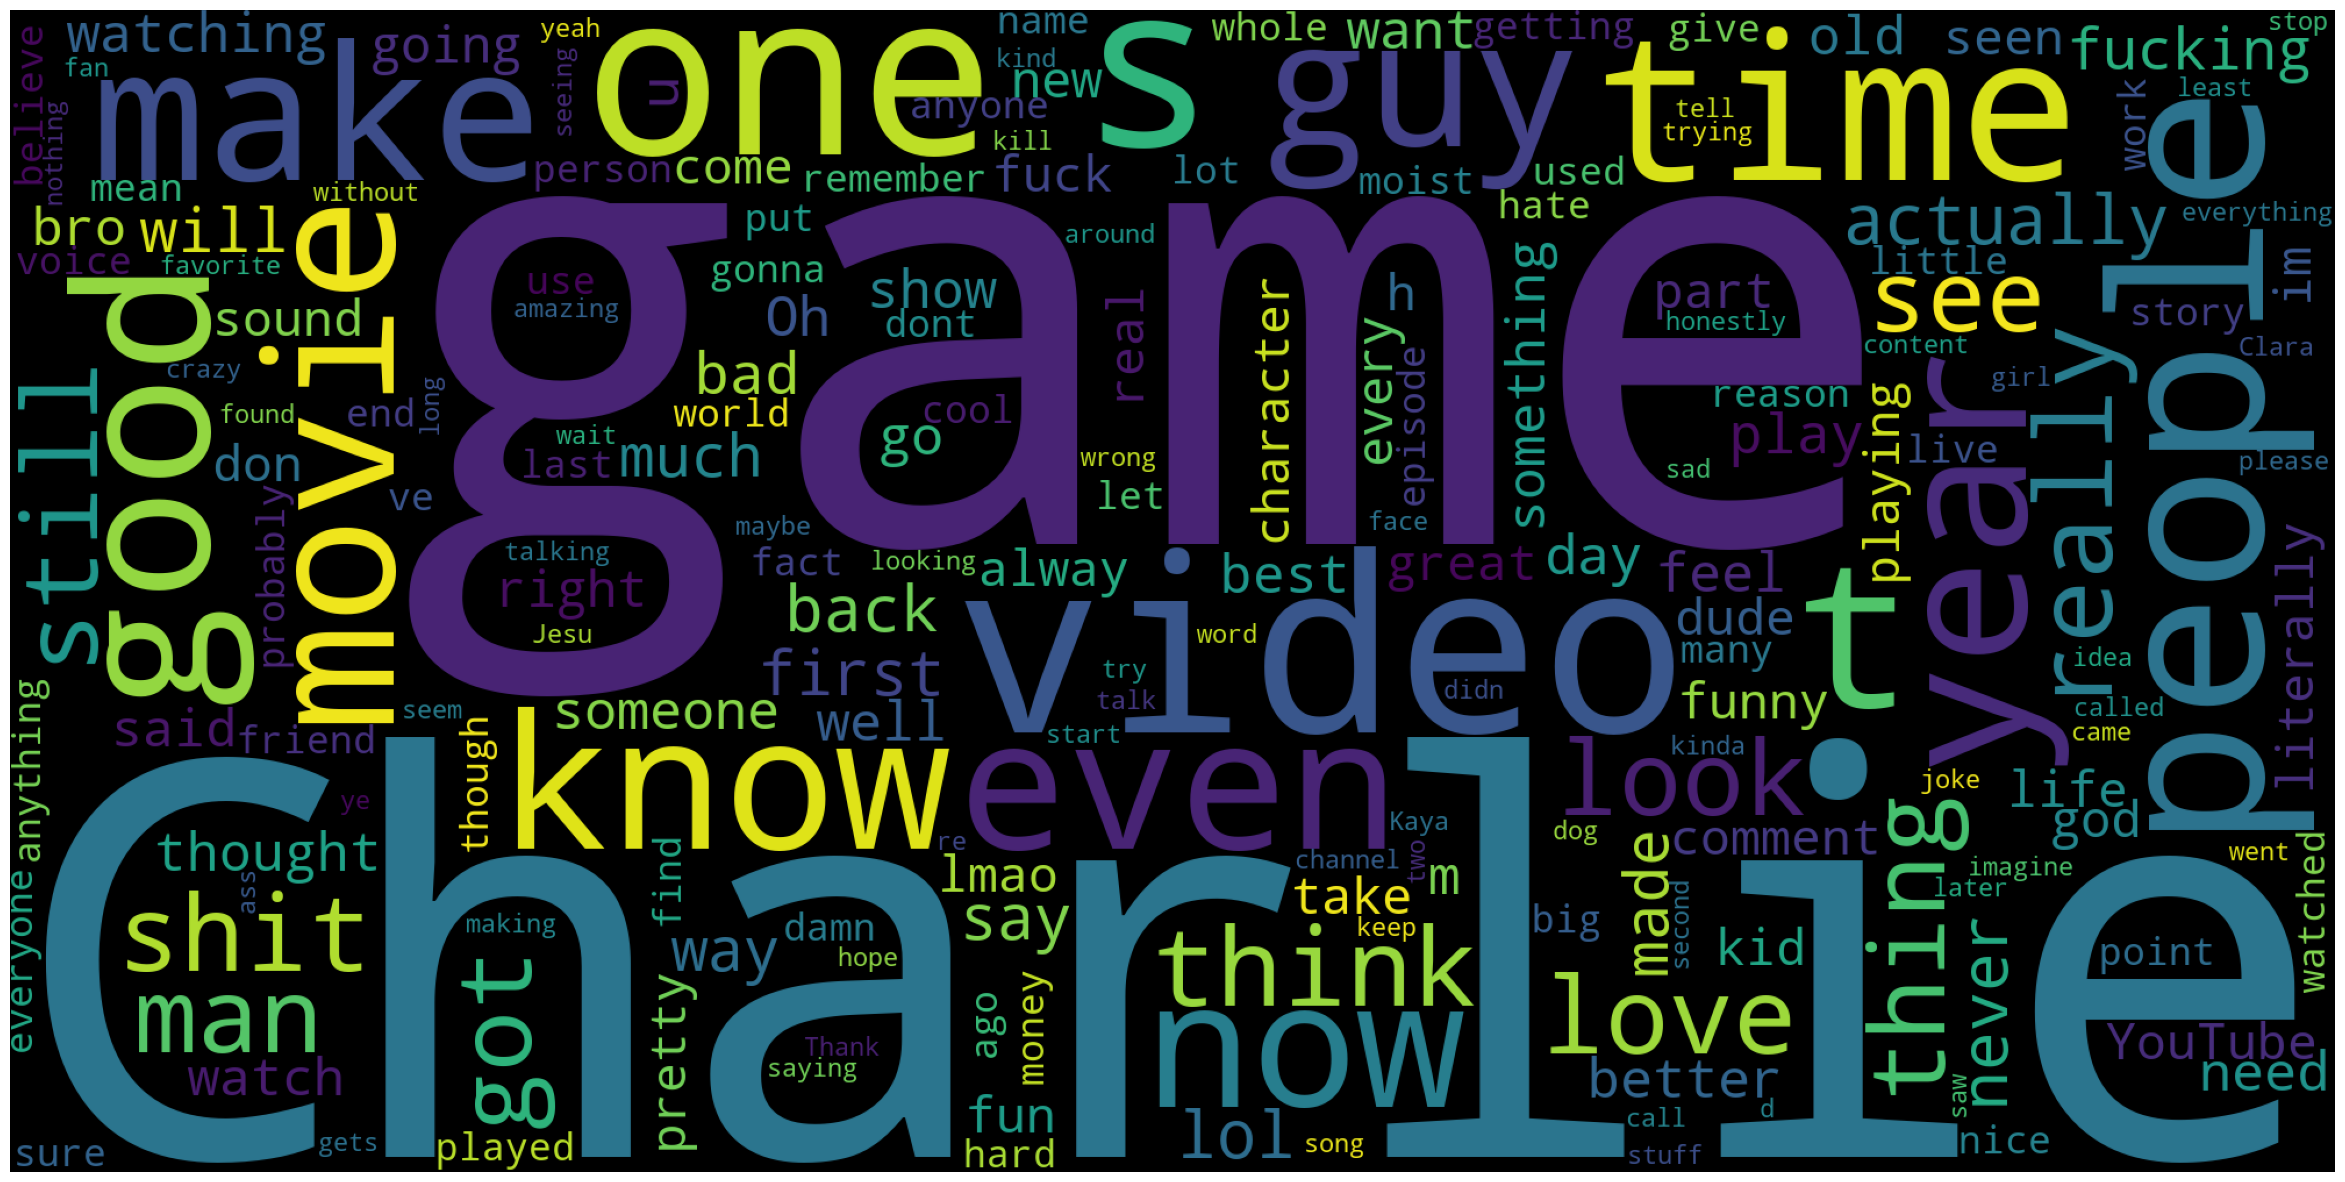

In [41]:
# Without Stopwords
all_words = list([a for b in comments['comments'].tolist() for a in b])
all_words_str = ' '.join(all_words)
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)